In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

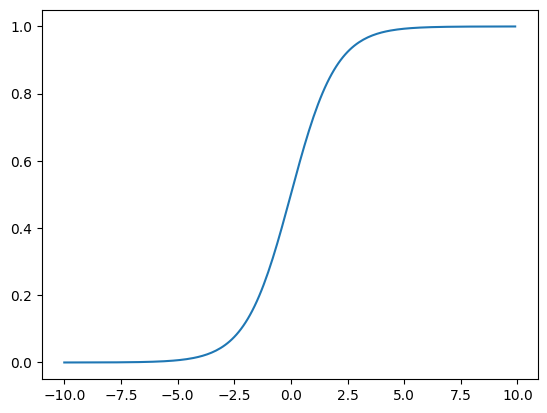

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)

In [3]:
data = datasets.load_iris()
df = pd.DataFrame(data["data"], columns=data["feature_names"]).drop(columns=["petal length (cm)"])
df.insert(2, "const", 1)
df["variety"] = data["target_names"][data["target"]]
df.insert(4, "setosa", df["variety"] == "setosa")

In [4]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
train, test = train_test_split(df, test_size=10, random_state=5)
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety
82,5.8,2.7,1,1.2,False,versicolor
134,6.1,2.6,1,1.4,False,virginica
114,5.8,2.8,1,2.4,False,virginica
42,4.4,3.2,1,0.2,True,setosa
109,7.2,3.6,1,2.5,False,virginica
57,4.9,2.4,1,1.0,False,versicolor
1,4.9,3.0,1,0.2,True,setosa
70,5.9,3.2,1,1.8,False,versicolor
25,5.0,3.0,1,0.2,True,setosa
84,5.4,3.0,1,1.5,False,versicolor


## Overview

1. regression for petal width
2. binary classification for setosa: T/F
3. binary classification for setosa: prob(T)
4. multi-class classification for variety

In [5]:
# PREDICT: petal width
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
reg = LinearRegression(fit_intercept=False)
reg.fit(train[xcols], train["petal width (cm)"])
test["predictions"] = reg.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predictions
82,5.8,2.7,1,1.2,False,versicolor,1.327769
134,6.1,2.6,1,1.4,False,virginica,1.590835
114,5.8,2.8,1,2.4,False,virginica,1.279061
42,4.4,3.2,1,0.2,True,setosa,0.083889
109,7.2,3.6,1,2.5,False,virginica,1.889735
57,4.9,2.4,1,1.0,False,versicolor,0.830818
1,4.9,3.0,1,0.2,True,setosa,0.538569
70,5.9,3.2,1,1.8,False,versicolor,1.155681
25,5.0,3.0,1,0.2,True,setosa,0.610022
84,5.4,3.0,1,1.5,False,versicolor,0.895833


In [130]:
# PREDICT: is it a setosa?
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
cls = LogisticRegression(fit_intercept=False)
cls.fit(train[xcols], train["setosa"])
test["predictions"] = cls.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predictions,setosa_prob
82,5.8,2.7,1,1.2,False,versicolor,False,0.059437
134,6.1,2.6,1,1.4,False,virginica,False,0.020275
114,5.8,2.8,1,2.4,False,virginica,False,0.085368
42,4.4,3.2,1,0.2,True,setosa,True,0.929430
109,7.2,3.6,1,2.5,False,virginica,False,0.066543
57,4.9,2.4,1,1.0,False,versicolor,False,0.147721
1,4.9,3.0,1,0.2,True,setosa,True,0.642773
70,5.9,3.2,1,1.8,False,versicolor,False,0.258524
25,5.0,3.0,1,0.2,True,setosa,True,0.585481
84,5.4,3.0,1,1.5,False,versicolor,False,0.349072


In [7]:
# accuracy: what percent of the time is it correct?
cls.score(test[xcols], test["setosa"])

1.0

In [8]:
# PREDICT: probability that it is a setosa (0 to 1 amount)

# [[False Prob, True Prob], ...]
cls.predict_proba(test[xcols])  # a numpy array of probabilities (that it is True)

array([[0.9405628 , 0.0594372 ],
       [0.97972503, 0.02027497],
       [0.91463241, 0.08536759],
       [0.07056997, 0.92943003],
       [0.93345725, 0.06654275],
       [0.85227945, 0.14772055],
       [0.35722665, 0.64277335],
       [0.74147607, 0.25852393],
       [0.41451931, 0.58548069],
       [0.65092753, 0.34907247]])

In [9]:
cls.predict_proba(test[xcols])[:, 1]

array([0.0594372 , 0.02027497, 0.08536759, 0.92943003, 0.06654275,
       0.14772055, 0.64277335, 0.25852393, 0.58548069, 0.34907247])

In [10]:
test["setosa_prob"] = cls.predict_proba(test[xcols])[:, 1]
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predictions,setosa_prob
82,5.8,2.7,1,1.2,False,versicolor,False,0.059437
134,6.1,2.6,1,1.4,False,virginica,False,0.020275
114,5.8,2.8,1,2.4,False,virginica,False,0.085368
42,4.4,3.2,1,0.2,True,setosa,True,0.929430
109,7.2,3.6,1,2.5,False,virginica,False,0.066543
57,4.9,2.4,1,1.0,False,versicolor,False,0.147721
1,4.9,3.0,1,0.2,True,setosa,True,0.642773
70,5.9,3.2,1,1.8,False,versicolor,False,0.258524
25,5.0,3.0,1,0.2,True,setosa,True,0.585481
84,5.4,3.0,1,1.5,False,versicolor,False,0.349072


In [11]:
# PREDICT: which of the 3 varieties is a particular Iris?
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
mult = LogisticRegression(fit_intercept=False)
mult.fit(train[xcols], train["variety"])
test["predictions"] = mult.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predictions,setosa_prob
82,5.8,2.7,1,1.2,False,versicolor,versicolor,0.059437
134,6.1,2.6,1,1.4,False,virginica,virginica,0.020275
114,5.8,2.8,1,2.4,False,virginica,versicolor,0.085368
42,4.4,3.2,1,0.2,True,setosa,setosa,0.929430
109,7.2,3.6,1,2.5,False,virginica,virginica,0.066543
57,4.9,2.4,1,1.0,False,versicolor,versicolor,0.147721
1,4.9,3.0,1,0.2,True,setosa,setosa,0.642773
70,5.9,3.2,1,1.8,False,versicolor,versicolor,0.258524
25,5.0,3.0,1,0.2,True,setosa,setosa,0.585481
84,5.4,3.0,1,1.5,False,versicolor,versicolor,0.349072


In [12]:
mult.score(test[xcols], test["variety"])

0.9

# Math behind the models: how do they predict

In [13]:
reg, cls, mult

(LinearRegression(fit_intercept=False),
 LogisticRegression(fit_intercept=False),
 LogisticRegression(fit_intercept=False))

In [14]:
reg.coef_.reshape(-1,1)

array([[ 0.71452794],
       [-0.48708032],
       [-1.5013766 ]])

In [15]:
X = test[xcols].values
X

array([[5.8, 2.7, 1. ],
       [6.1, 2.6, 1. ],
       [5.8, 2.8, 1. ],
       [4.4, 3.2, 1. ],
       [7.2, 3.6, 1. ],
       [4.9, 2.4, 1. ],
       [4.9, 3. , 1. ],
       [5.9, 3.2, 1. ],
       [5. , 3. , 1. ],
       [5.4, 3. , 1. ]])

In [16]:
# PREDICT a number (LinearRegression)
X @ reg.coef_.reshape(-1,1)

array([[1.32776857],
       [1.59083498],
       [1.27906054],
       [0.0838893 ],
       [1.8897354 ],
       [0.83081752],
       [0.53856933],
       [1.15568121],
       [0.61002213],
       [0.8958333 ]])

In [17]:
reg.predict(test[xcols])

array([1.32776857, 1.59083498, 1.27906054, 0.0838893 , 1.8897354 ,
       0.83081752, 0.53856933, 1.15568121, 0.61002213, 0.8958333 ])

In [18]:
# PREDICT True/False (LogisticRegression, binary classifier)
cls.coef_.T

array([[-2.42108094],
       [ 3.90002306],
       [ 0.75064911]])

In [19]:
X @ cls.coef_.T # negative => False, positive => True

array([[-2.76155804],
       [-3.87788463],
       [-2.37155574],
       [ 2.5779668 ],
       [-2.6410506 ],
       [-1.75259212],
       [ 0.58742172],
       [-1.05365461],
       [ 0.34531362],
       [-0.62311875]])

In [20]:
X @ cls.coef_.T > 0

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False]])

In [21]:
# PREDICT the probability of True
sigmoid(X @ cls.coef_.T)

array([[0.0594372 ],
       [0.02027497],
       [0.08536759],
       [0.92943003],
       [0.06654275],
       [0.14772055],
       [0.64277335],
       [0.25852393],
       [0.58548069],
       [0.34907247]])

In [22]:
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predictions,setosa_prob
82,5.8,2.7,1,1.2,False,versicolor,versicolor,0.059437
134,6.1,2.6,1,1.4,False,virginica,virginica,0.020275
114,5.8,2.8,1,2.4,False,virginica,versicolor,0.085368
42,4.4,3.2,1,0.2,True,setosa,setosa,0.929430
109,7.2,3.6,1,2.5,False,virginica,virginica,0.066543
57,4.9,2.4,1,1.0,False,versicolor,versicolor,0.147721
1,4.9,3.0,1,0.2,True,setosa,setosa,0.642773
70,5.9,3.2,1,1.8,False,versicolor,versicolor,0.258524
25,5.0,3.0,1,0.2,True,setosa,setosa,0.585481
84,5.4,3.0,1,1.5,False,versicolor,versicolor,0.349072


In [23]:
# PREDICT among multiple (3+) categories

In [24]:
# each column contains coefficients for scoring a different variety
mult.coef_.T

array([[-1.80097204,  0.64875706,  1.15221498],
       [ 3.01989635, -1.46308696, -1.55680939],
       [ 0.69404974,  1.04354373, -1.73759347]])

In [25]:
mult.classes_ # column 0 => setosa, etc

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [26]:
X

array([[5.8, 2.7, 1. ],
       [6.1, 2.6, 1. ],
       [5.8, 2.8, 1. ],
       [4.4, 3.2, 1. ],
       [7.2, 3.6, 1. ],
       [4.9, 2.4, 1. ],
       [4.9, 3. , 1. ],
       [5.9, 3.2, 1. ],
       [5. , 3. , 1. ],
       [5.4, 3. , 1. ]])

In [27]:
mult.coef_.T[:, [0]] # setosa coefficients

array([[-1.80097204],
       [ 3.01989635],
       [ 0.69404974]])

In [28]:
X @ mult.coef_.T[:, [0]] # setosa scores

array([[-1.59786793],
       [-2.44014918],
       [-1.2958783 ],
       [ 2.43344109],
       [-1.40132207],
       [-0.88296201],
       [ 0.9289758 ],
       [-0.26801696],
       [ 0.7488786 ],
       [ 0.02848978]])

In [29]:
X @ mult.coef_.T[:, [1]] # versicolor scores

array([[ 0.85599987],
       [ 1.19693568],
       [ 0.70969118],
       [-0.78380349],
       [ 0.44748149],
       [ 0.71104461],
       [-0.16680757],
       [ 0.1893321 ],
       [-0.10193186],
       [ 0.15757096]])

In [30]:
X @ mult.coef_.T[:, [2]] # virginica scores

array([[ 0.74186806],
       [ 1.24321349],
       [ 0.58618712],
       [-1.6496376 ],
       [ 0.95384058],
       [ 0.1719174 ],
       [-0.76216824],
       [ 0.07868487],
       [-0.64694674],
       [-0.18606075]])

In [31]:
X @ mult.coef_.T

array([[-1.59786793,  0.85599987,  0.74186806],
       [-2.44014918,  1.19693568,  1.24321349],
       [-1.2958783 ,  0.70969118,  0.58618712],
       [ 2.43344109, -0.78380349, -1.6496376 ],
       [-1.40132207,  0.44748149,  0.95384058],
       [-0.88296201,  0.71104461,  0.1719174 ],
       [ 0.9289758 , -0.16680757, -0.76216824],
       [-0.26801696,  0.1893321 ,  0.07868487],
       [ 0.7488786 , -0.10193186, -0.64694674],
       [ 0.02848978,  0.15757096, -0.18606075]])

In [32]:
# MATRIX1 (data) @ MATRIX2 (coef)
# NESTED LOOP:
# FOR EACH ROW OF MATRIX 1
#     FOR EACH COEFFICIENT COLUMN OF MATRIX2
#          compute the vector@vector (dot product)

In [33]:
mult.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [34]:
# ASIDE: max, argmax (same idea for min, argmin)
a = np.array([1,2,9,8,7])
a.max()

9

In [35]:
a.argmax() # index of the largest value

2

In [36]:
(X @ mult.coef_.T).argmax(axis=1)

array([1, 2, 1, 0, 2, 1, 0, 1, 0, 1])

In [37]:
mult.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [38]:
mult.classes_[[0, 2, 1, 1, 1]]

array(['setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor'],
      dtype=object)

In [39]:
mult.classes_[(X @ mult.coef_.T).argmax(axis=1)]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [40]:
mult.predict(test[xcols])

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [41]:
cls.coef_

array([[-2.42108094,  3.90002306,  0.75064911]])

In [42]:
# MATRIX @ vertical vector of coef
# LOOP OVER ROWS OF MATRIX
#     ROW (horizontal) @ c

# Visualize Decision Boundaries

In [45]:
import numpy as np              # np.meshgrid
import matplotlib.pyplot as plt # plt.contourf

In [46]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
X, Y = np.meshgrid(np.arange(10), np.arange(10))

In [49]:
X # in each cell, the number is the x coordinate of that position

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [50]:
Y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])

In [51]:
Z = X * Y    # Z = F(X, Y)      F(X, Y) = X*Y
Z

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

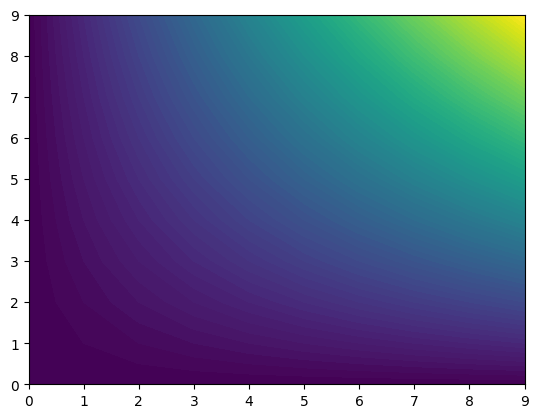

In [53]:
plt.contourf(X, Y, Z, levels=100)

In [ ]:
# Z = F(X, Y)       where F(X, Y) is model.predict(sepal width, sepal length)

In [54]:
cls

LogisticRegression(fit_intercept=False)

In [56]:
df[xcols]

,sepal length (cm),sepal width (cm),const
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,1
147,6.5,3.0,1
148,6.2,3.4,1


In [59]:
sepl, sepw = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
sepl

array([[0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       ...,
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9]])

In [ ]:
# predictions = F(sepl, sepw)

In [64]:
predict_df = pd.DataFrame({
    'sepal length (cm)': sepl.reshape(-1),
    'sepal width (cm)': sepw.reshape(-1),
    'const': 1
})
predict_df.head()

,sepal length (cm),sepal width (cm),const
0,0.0,0.0,1
1,0.1,0.0,1
2,0.2,0.0,1
3,0.3,0.0,1
4,0.4,0.0,1


In [67]:
Z_predictions = cls.predict(predict_df)
Z_predictions

array([ True,  True,  True, ...,  True,  True,  True])

In [69]:
print(sepl.shape)
print(sepw.shape)
print(Z_predictions.shape)

(100, 100)
(100, 100)
(10000,)


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

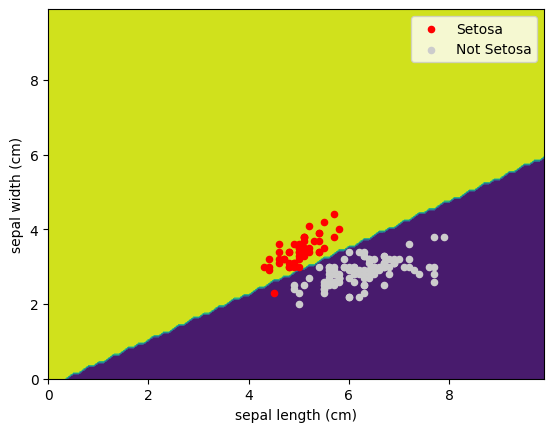

In [82]:
plt.contourf(sepl, sepw, Z_predictions.reshape(sepl.shape))
ax = plt.gca()   # get current axes subplot
df[df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax,
                              color="r", label="Setosa")
df[~df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, 
                               color="0.8", label="Not Setosa")

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([
    ("pf", PolynomialFeatures(degree=10, include_bias=False)),
    ("lr", LogisticRegression(fit_intercept=False)),
])
model.fit(train[xcols], train["setosa"])

Pipeline(steps=[('pf', PolynomialFeatures(degree=10, include_bias=False)),
                ('lr', LogisticRegression(fit_intercept=False))])

In [102]:
sepl, sepw = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
predict_df = pd.DataFrame({
    'sepal length (cm)': sepl.reshape(-1),
    'sepal width (cm)': sepw.reshape(-1),
    'const': 1
})
Z_predictions = model.predict(predict_df)
Z_predictions

array([ True,  True,  True, ...,  True,  True,  True])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

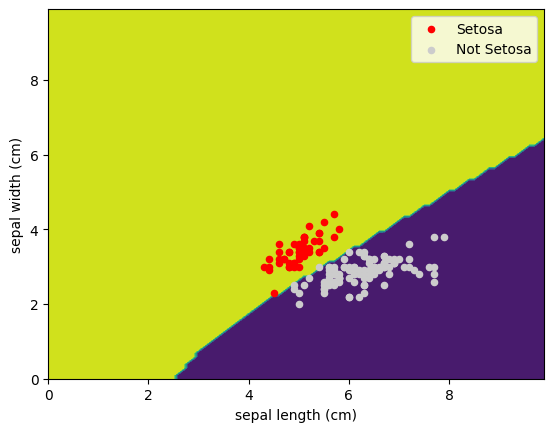

In [103]:
plt.contourf(sepl, sepw, Z_predictions.reshape(sepl.shape))
ax = plt.gca()
df[df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax,
                              color="r", label="Setosa")
df[~df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, 
                               color="0.8", label="Not Setosa")

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("lr", LogisticRegression(fit_intercept=False)),
])
model.fit(train[xcols], train["variety"])

/home/trh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('pf', PolynomialFeatures(degree=5, include_bias=False)),
                ('lr', LogisticRegression(fit_intercept=False))])

In [ ]:
# LogisticRegression uses an "iterative algorithm"

# chooses some random coefficients
# LOOP (some fixed number of iterations/"epochs")
#     tweaks the coefficients to get slightly better accuracy
#     if accuarcy isn't improving much:
#          exit the loop early

In [113]:
# solution 1: increase number of iterations

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("lr", LogisticRegression(fit_intercept=False, max_iter=1000)),
])
model.fit(train[xcols], train["variety"])

Pipeline(steps=[('pf', PolynomialFeatures(degree=5, include_bias=False)),
                ('lr', LogisticRegression(fit_intercept=False, max_iter=1000))])

In [ ]:
# solution 2: transform the data into something LogisticRegression
# can learn from more quickly
#
# LogisticRegression likes data that is standardized:
# 1. "small" numbers
# 2. "centered" numbers (average of the column is 0)

In [114]:
a = np.array([1,2,8,9])
a

array([1, 2, 8, 9])

In [115]:
a - a.mean()

array([-4., -3.,  3.,  4.])

In [117]:
a / 10

array([0.1, 0.2, 0.8, 0.9])

In [118]:
a / a.std()

array([0.28284271, 0.56568542, 2.2627417 , 2.54558441])

In [119]:
# LogisticRegression would like to learn from a column of data that looks like this
(a - a.mean()) / a.std()

array([-1.13137085, -0.84852814,  0.84852814,  1.13137085])

In [121]:
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(a.reshape(-1,1))

array([[-1.13137085],
       [-0.84852814],
       [ 0.84852814],
       [ 1.13137085]])

In [122]:
# Advice: always use StandardScaler with LogisticRegression

In [125]:
# solution 2: use StandardScaler
model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("std", StandardScaler()),
    ("lr", LogisticRegression(fit_intercept=False, max_iter=100)),
])
model.fit(train[xcols], train["variety"])

Pipeline(steps=[('pf', PolynomialFeatures(degree=5, include_bias=False)),
                ('std', StandardScaler()),
                ('lr', LogisticRegression(fit_intercept=False))])

In [ ]:
# Advice: PolynomialFeatures should be BEFORE StandardScaler (when using both)

In [126]:
a

array([1, 2, 8, 9])

In [128]:
scaled = (a - a.mean()) / a.std()   # like StandardScaler
scaled

array([-1.13137085, -0.84852814,  0.84852814,  1.13137085])

In [129]:
scaled ** 2   # like PolynomialFeatures

array([1.28, 0.72, 0.72, 1.28])

In [ ]:
X @ c = y